### This is a program to predict points per team in NFL games.  The data is from:
 https://www.pro-football-reference.com/
 https://sonnymoorepowerratings.com/nfl-foot.htm
 https://www.nflweather.com/en/
 https://www.footballoutsiders.com/    

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the training data
train_data = pd.read_csv('C:/Users/sarae/Desktop/NFL_Modeling/completedgames.csv')

In [4]:
# select feature variables to be scaled
features = train_data.iloc[:,11:]

max_abs_scaler = preprocessing.MaxAbsScaler()

#fit and transform and save as X 
X = max_abs_scaler.fit_transform(features)


In [5]:
# save result variable as y
y = train_data['PtsW']

In [6]:
# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=42)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((123, 93), (123, 93), (123,), (123,))

In [7]:
# create an object of the LinearRegression Model
model_LR = linear_model.ElasticNetCV(max_iter = 10000)

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train_LR = model_LR.predict(train_x)
predict_test_LR  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date 6.49, 11.21, 0.73 ridge .40
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_LR)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_LR)**(0.5))

RMSE on train data:  7.762012273381993
RMSE on test data:  9.031336291916476


In [8]:
model_LR.score(test_x, test_y)

0.10854439746548938

In [9]:
# create a list of alpha run the small set first and tweak second to add dimension
#alphas = (0.1, 0.25, 0.5, 0.75, 0.9, 1)
alphas = [vala/100 for vala in range(35, 65,5)]
# create a list ratios
#rations = (0, .1, .25, .5, .75, .9, 1)
ratios = [valb/100 for valb in range(90, 99)]

for alpha in alphas:
    for ratio in ratios:

        # instantiate the classifier
        model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, max_iter=1000000)

        # fit the classifier to the training data
        model_LR.fit(train_x, train_y)

        # predict with the classifier using the .predict() function
        pred_y = model_LR.predict(test_x)

        # view the model accuracy with the accuracy_score() function, Accuracy: 16.0% | penalty = 0.7, C = 0.1
        accuracy = model_LR.score(test_x, test_y)
        accuracy_rd = round(accuracy*100,1)

        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | alpha = {alpha}, ratio = {ratio}')

Accuracy: 4.7% | alpha = 0.35, ratio = 0.9
Accuracy: 4.8% | alpha = 0.35, ratio = 0.91
Accuracy: 5.0% | alpha = 0.35, ratio = 0.92
Accuracy: 5.1% | alpha = 0.35, ratio = 0.93
Accuracy: 5.3% | alpha = 0.35, ratio = 0.94
Accuracy: 5.4% | alpha = 0.35, ratio = 0.95
Accuracy: 5.6% | alpha = 0.35, ratio = 0.96
Accuracy: 5.8% | alpha = 0.35, ratio = 0.97
Accuracy: 5.9% | alpha = 0.35, ratio = 0.98
Accuracy: 3.6% | alpha = 0.4, ratio = 0.9
Accuracy: 3.7% | alpha = 0.4, ratio = 0.91
Accuracy: 3.9% | alpha = 0.4, ratio = 0.92
Accuracy: 4.0% | alpha = 0.4, ratio = 0.93
Accuracy: 4.2% | alpha = 0.4, ratio = 0.94
Accuracy: 4.4% | alpha = 0.4, ratio = 0.95
Accuracy: 4.6% | alpha = 0.4, ratio = 0.96
Accuracy: 4.8% | alpha = 0.4, ratio = 0.97
Accuracy: 5.0% | alpha = 0.4, ratio = 0.98
Accuracy: 2.7% | alpha = 0.45, ratio = 0.9
Accuracy: 2.8% | alpha = 0.45, ratio = 0.91
Accuracy: 2.9% | alpha = 0.45, ratio = 0.92
Accuracy: 3.1% | alpha = 0.45, ratio = 0.93
Accuracy: 3.2% | alpha = 0.45, ratio = 0.94


In [10]:
# optimal penalty and C
alpha = 0.5
ratio = 0.95

options = [True, False]

for option in options:
    intercept = option
    for option in options:

        # instantiate the classifier
        model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, fit_intercept = intercept, normalize = option, 
                                           max_iter=1000000)

        # fit the classifier to the training data
        model_LR.fit(train_x, train_y)

        # predict with the classifier using the .predict() function
        pred_y = model_LR.predict(test_x)

        # view the model accuracy with the accuracy_score() function
        accuracy = model_LR.score(test_x, test_y)
        accuracy_rd = round(accuracy*100,1)

        # print accuracy for each combination intercept and normal
        print(f'Accuracy: {accuracy_rd}% | intercept = {intercept}, normalize = {option}')

Accuracy: -3.9% | intercept = True, normalize = True
Accuracy: 2.3% | intercept = True, normalize = False
Accuracy: 5.7% | intercept = False, normalize = True
Accuracy: 5.7% | intercept = False, normalize = False


In [11]:
# set the test size and hyperparameters
alpha = 0.5
ratio = 0.95
intercept = False
normalize = False
accvar = 0

# create a list of test_sizes
test_sizes = [val/200 for val in range(30, 150)]

for test_size in test_sizes:

    # create a list of test_sizes
    test_sizes = [val/200 for val in range(30, 150)]

    # train-test split
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, fit_intercept = intercept, normalize = option, 
                                               max_iter=1000000)

    # fit the classifier to the training data
    model_LR.fit(train_x, train_y)
    
    # predict with the classifier using the .predict() function
    pred_y = model_LR.predict(test_x)

    # view the model accuracy with the accuracy_score() function
    accuracy = model_LR.score(test_x, test_y)
    accuracy_rd = round(accuracy*100,1)
    if accuracy_rd > accvar:
        accvar = accuracy_rd
        ts = test_size

    # print accuracy for each test_size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')
ts

Accuracy: 1.5% | test size = 0.15
Accuracy: 5.0% | test size = 0.155
Accuracy: 6.4% | test size = 0.16
Accuracy: 7.2% | test size = 0.165
Accuracy: 7.3% | test size = 0.17
Accuracy: 5.1% | test size = 0.175
Accuracy: 5.1% | test size = 0.18
Accuracy: 5.8% | test size = 0.185
Accuracy: 5.5% | test size = 0.19
Accuracy: 6.4% | test size = 0.195
Accuracy: 7.5% | test size = 0.2
Accuracy: 9.9% | test size = 0.205
Accuracy: 9.8% | test size = 0.21
Accuracy: 8.6% | test size = 0.215
Accuracy: 9.7% | test size = 0.22
Accuracy: 9.4% | test size = 0.225
Accuracy: 8.9% | test size = 0.23
Accuracy: 9.9% | test size = 0.235
Accuracy: 11.9% | test size = 0.24
Accuracy: 10.1% | test size = 0.245
Accuracy: 9.3% | test size = 0.25
Accuracy: 9.2% | test size = 0.255
Accuracy: 9.7% | test size = 0.26
Accuracy: 9.8% | test size = 0.265
Accuracy: 11.0% | test size = 0.27
Accuracy: 11.1% | test size = 0.275
Accuracy: 11.0% | test size = 0.28
Accuracy: 11.5% | test size = 0.285
Accuracy: 9.5% | test size = 

0.24

In [12]:
# set the test size and hyperparameters
alpha = 0.5
ratio = 0.95
intercept = False
normalize = False
tets_size = 0.72

# train-test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=42)

# instantiate the classifier
model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, fit_intercept = intercept, normalize = option, 
                                           max_iter=1000000)

# fit the classifier to the training data
model_LR.fit(train_x, train_y)

# predict with the classifier using the .predict() function
pred_y = model_LR.predict(test_x)

In [14]:
# load new dataset
predictweek = pd.read_csv('C:/Users/sarae/Desktop/NFL_Modeling/tomodel.csv')

# view first few rows
predictweek.head()

,Week,Day,Date,Time,full_team_name,full_team_name_def,home,PtsW,PtsL,Spread,...,def_dvoa_off_Sacks,def_dvoa_def_Adjusted Line Yards,def_dvoa_def_Running Back Yards,def_dvoa_def_Power Success Rate,def_dvoa_def_Open Field Yards,def_dvoa_def_Second Level Yards,def_dvoa_def_Stuffed Rate,def_dvoa_def_Adjusted Sack Rate,def_dvoa_def_Sacks,def_hfa
0,9,Thu,11/3/2022,8:15PM,Philadelphia Eagles,Houston Texans,1,NaN,NaN,NaN,...,16.0,5.35,5.71,0.75,1.25,1.92,0.19,0.06,15.0,2.80
1,9,Sun,11/6/2022,1:00PM,Buffalo Bills,New York Jets,1,NaN,NaN,NaN,...,19.0,4.09,4.05,0.65,0.64,1.15,0.19,0.07,21.0,2.27
2,9,Sun,11/6/2022,1:00PM,Carolina Panthers,Cincinnati Bengals,1,NaN,NaN,NaN,...,30.0,4.56,4.12,0.67,0.48,1.22,0.18,0.06,14.0,2.08
3,9,Sun,11/6/2022,1:00PM,Indianapolis Colts,New England Patriots,1,NaN,NaN,NaN,...,18.0,4.74,4.27,0.68,0.45,1.14,0.10,0.08,23.0,2.05
4,9,Sun,11/6/2022,1:00PM,Green Bay Packers,Detroit Lions,1,NaN,NaN,NaN,...,13.0,4.81,5.24,0.64,1.38,1.52,0.18,0.06,11.0,2.89


In [15]:
# select just the game stats
new_X = predictweek.loc[:,features.columns]

# standardize using original data's scaling
new_X_sc = max_abs_scaler.fit_transform(new_X)

In [16]:
# get new predictions
new_preds = model_LR.predict(new_X_sc)

intpred = []

for pred in new_preds:
    intpred.append(int(pred))

intpred

[19,
 17,
 19,
 19,
 19,
 20,
 18,
 19,
 21,
 19,
 18,
 20,
 17,
 21,
 20,
 20,
 20,
 22,
 21,
 22,
 21,
 22,
 23,
 20,
 22,
 22]

In [279]:
model_LR.score(test_x, test_y)

0.1143295465568378

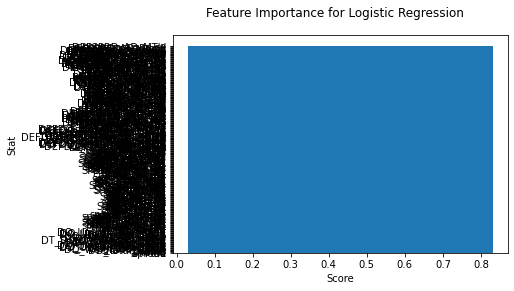

In [237]:
# get importance
importance = abs(model_LR.coef_[0])

# visualize feature importance
plt.bar(x=importance, height=features.columns)

# add labels and titles
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()